In [2]:
!pip install tensorflow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import pandas as pd

file_path = '/content/drive/My Drive/snappfood_pre_processed_dataset.csv' # Replace with the copied path
df = pd.read_csv(file_path)
df.head()

,comments,label
0,غذا سرد صورتیکه فاصله,0
1,بهتره بتون ران سینه خودمون انتخاب,1
2,غذا بد حالم بده دل دردو دل پیچه معلوم چی توش ر...,0
3,سلام سابق بسته کیفیت بهتری برخوردار حاضر ایراد...,0
4,سلام منون متشکر,1


In [27]:
df = df.dropna()

In [28]:
comments = df["comments"]
labels = df["label"]

label
1    26004
0    25790
Name: count, dtype: int64


<ipython-input-29-a3e00efbff29>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'label', data = df, palette = 'Set3')


<Axes: xlabel='label', ylabel='count'>

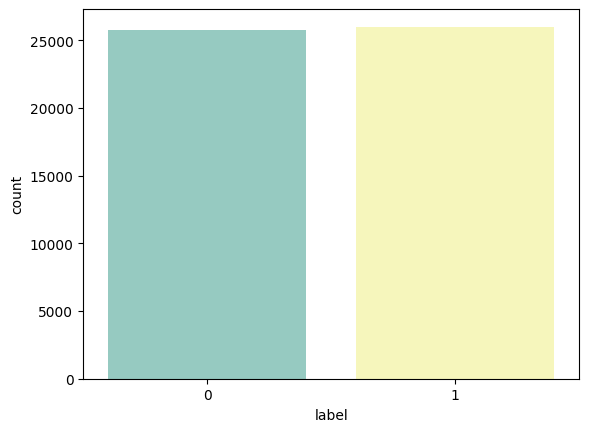

In [29]:
import seaborn as sns

print(df['label'].value_counts())
sns.countplot(x = 'label', data = df, palette = 'Set3')

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(comments, labels, test_size=0.2, stratify=labels)

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')

In [33]:
import tensorflow as tf

def create_model(embedding_dim, lstm_layers, dropout_rate):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(input_dim=10000, output_dim=embedding_dim, input_length=maxlen))
    for _ in range(lstm_layers - 1):
        model.add(tf.keras.layers.LSTM(128, return_sequences=True))
    model.add(tf.keras.layers.LSTM(128))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


Training model with emb_dim=64, lstm_layers=1, dropout=0.2
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


583/583 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5007 - loss: 0.6937 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 2/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.4948 - loss: 0.6934 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 3/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5044 - loss: 0.6933 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 4/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4984 - loss: 0.6933 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 5/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5002 - loss: 0.6933 - val_accuracy: 0.5051 - val_loss: 0.6931
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

       happy       0.00      0.00      0.00      5158
         sad       0.50      1.00      0.67      5201

    accuracy                           0.50     10359
   macro avg       0.25      0.50      0.33     10359
weighted avg       0.25      0.50      0.34     10359


Train

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


583/583 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4998 - loss: 0.6940 - val_accuracy: 0.4949 - val_loss: 0.6934
Epoch 2/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5022 - loss: 0.6934 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 3/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5020 - loss: 0.6934 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 4/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5029 - loss: 0.6934 - val_accuracy: 0.5058 - val_loss: 0.6931
Epoch 5/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4978 - loss: 0.6934 - val_accuracy: 0.5053 - val_loss: 0.6931
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

       happy       0.00      0.00      0.00      5158
         sad       0.50      1.00      0.67      5201

    accuracy                           0.50     10359
   macro avg       0.25      0.50      0.33     10359
weighted avg       0.25      0.50      0.34     10359


Train

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4948 - loss: 0.6940 - val_accuracy: 0.4949 - val_loss: 0.6932
Epoch 2/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5082 - loss: 0.6933 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 3/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5024 - loss: 0.6934 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 4/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.4981 - loss: 0.6932 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 5/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5004 - loss: 0.6933 - val_accuracy: 0.5051 - val_loss: 0.6931
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

       happy       0.00      0.00      0.00      5158
         sad       0.50      1.00      0.67      5201

    accuracy                           0.50     10359
   macro avg       0.25      0.50      0.33     10359
weighted avg       0.25      0.50      0.34     10359

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src

583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5035 - loss: 0.6941 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 2/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5026 - loss: 0.6937 - val_accuracy: 0.4949 - val_loss: 0.6932
Epoch 3/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5011 - loss: 0.6935 - val_accuracy: 0.4949 - val_loss: 0.6932
Epoch 4/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5026 - loss: 0.6934 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 5/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5002 - loss: 0.6933 - val_accuracy: 0.4949 - val_loss: 0.6936
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

       happy       0.50      1.00      0.66      5158
         sad       1.00      0.00      0.00      5201

    accuracy                           0.50     10359
   macro avg       0.75      0.50      0.33     10359
weighted avg       0.75      0.50      0.33     10359

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


583/583 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4986 - loss: 0.6938 - val_accuracy: 0.4949 - val_loss: 0.6937
Epoch 2/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5012 - loss: 0.6935 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 3/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5034 - loss: 0.6934 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 4/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5038 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6933
Epoch 5/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5049 - loss: 0.6932 - val_accuracy: 0.5051 - val_loss: 0.6931
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

       happy       0.00      0.00      0.00      5158
         sad       0.50      1.00      0.67      5201

    accuracy                           0.50     10359
   macro avg       0.25      0.50      0.33     10359
weighted avg       0.25      0.50      0.34     10359


T

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


583/583 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5056 - loss: 0.6940 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 2/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4991 - loss: 0.6938 - val_accuracy: 0.5051 - val_loss: 0.6933
Epoch 3/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4963 - loss: 0.6937 - val_accuracy: 0.5051 - val_loss: 0.6932
Epoch 4/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5041 - loss: 0.6935 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 5/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4972 - loss: 0.6934 - val_accuracy: 0.5051 - val_loss: 0.6931
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

       happy       0.00      0.00      0.00      5158
         sad       0.50      1.00      0.67      5201

    accuracy                           0.50     10359
   macro avg       0.25      0.50      0.33     10359
weighted avg       0.25      0.50      0.34     10359


Trai

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


583/583 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5000 - loss: 0.6941 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 2/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.4978 - loss: 0.6935 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 3/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5041 - loss: 0.6933 - val_accuracy: 0.5053 - val_loss: 0.6931
Epoch 4/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5045 - loss: 0.6932 - val_accuracy: 0.4949 - val_loss: 0.6935
Epoch 5/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5007 - loss: 0.6933 - val_accuracy: 0.5051 - val_loss: 0.6933
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

       happy       0.00      0.00      0.00      5158
         sad       0.50      1.00      0.67      5201

    accuracy                           0.50     10359
   macro avg       0.25      0.50      0.33     10359
weighted avg       0.25      0.50      0.34     10359


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src

583/583 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.4998 - loss: 0.6941 - val_accuracy: 0.5053 - val_loss: 0.6931
Epoch 2/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4964 - loss: 0.6937 - val_accuracy: 0.4949 - val_loss: 0.6932
Epoch 3/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.4956 - loss: 0.6935 - val_accuracy: 0.5053 - val_loss: 0.6931
Epoch 4/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.5017 - loss: 0.6934 - val_accuracy: 0.4949 - val_loss: 0.6933
Epoch 5/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4960 - loss: 0.6936 - val_accuracy: 0.4949 - val_loss: 0.6936
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

       happy       0.50      1.00      0.66      5158
         sad       0.00      0.00      0.00      5201

    accuracy                           0.50     10359
   macro avg       0.25      0.50      0.33     10359
weighted avg       0.25      0.50      0.33     10359


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src

583/583 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4961 - loss: 0.6943 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 2/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4991 - loss: 0.6936 - val_accuracy: 0.5051 - val_loss: 0.6936
Epoch 3/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5008 - loss: 0.6935 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 4/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.4945 - loss: 0.6935 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 5/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4962 - loss: 0.6935 - val_accuracy: 0.5051 - val_loss: 0.6931
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

       happy       0.33      0.00      0.00      5158
         sad       0.50      1.00      0.67      5201

    accuracy                           0.50     10359
   macro avg       0.42      0.50      0.33     10359
weighted avg       0.42      0.50      0.34     10359



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


583/583 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4996 - loss: 0.6953 - val_accuracy: 0.4947 - val_loss: 0.6933
Epoch 2/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5012 - loss: 0.6938 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 3/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4992 - loss: 0.6936 - val_accuracy: 0.4947 - val_loss: 0.6942
Epoch 4/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5000 - loss: 0.6939 - val_accuracy: 0.4947 - val_loss: 0.6967
Epoch 5/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5202 - loss: 0.6811 - val_accuracy: 0.7744 - val_loss: 0.4999
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

       happy       0.75      0.81      0.78      5158
         sad       0.80      0.74      0.77      5201

    accuracy                           0.77     10359
   macro avg       0.78      0.77      0.77     10359
weighted avg       0.78      0.77      0.77     10359



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


583/583 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.4936 - loss: 0.6947 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 2/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.5001 - loss: 0.6934 - val_accuracy: 0.5051 - val_loss: 0.6938
Epoch 3/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.4977 - loss: 0.6933 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 4/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5047 - loss: 0.6933 - val_accuracy: 0.5051 - val_loss: 0.6932
Epoch 5/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.4990 - loss: 0.6934 - val_accuracy: 0.4947 - val_loss: 0.6934
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

       happy       0.50      1.00      0.66      5158
         sad       0.00      0.00      0.00      5201

    accuracy                           0.50     10359
   macro avg       0.25      0.50      0.33     10359
weighted avg       0.25      0.50      0.33     10359

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


583/583 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4992 - loss: 0.6952 - val_accuracy: 0.5051 - val_loss: 0.6932
Epoch 2/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.4993 - loss: 0.6937 - val_accuracy: 0.5053 - val_loss: 0.6931
Epoch 3/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.4943 - loss: 0.6937 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 4/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.4974 - loss: 0.6935 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 5/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5042 - loss: 0.6934 - val_accuracy: 0.5051 - val_loss: 0.6931
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

       happy       0.00      0.00      0.00      5158
         sad       0.50      1.00      0.67      5201

    accuracy                           0.50     10359
   macro avg       0.25      0.50      0.33     10359
weighted avg       0.25      0.50      0.34     10359

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


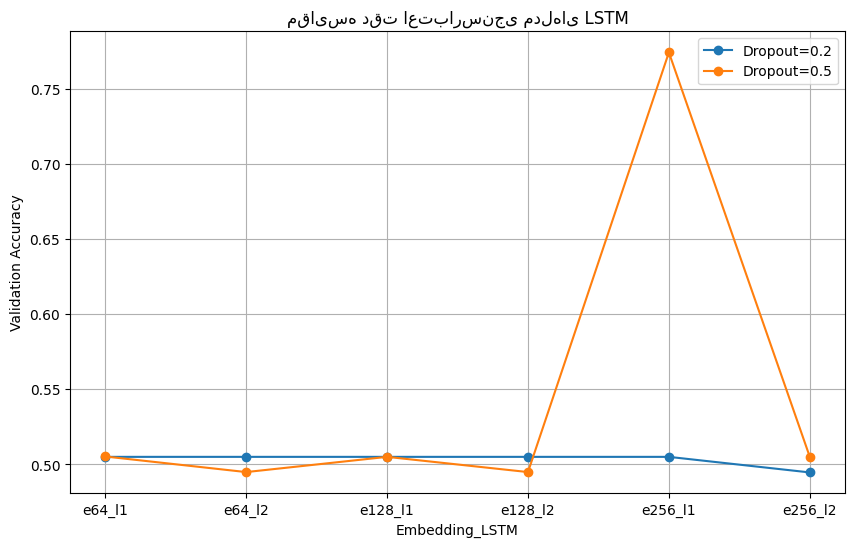

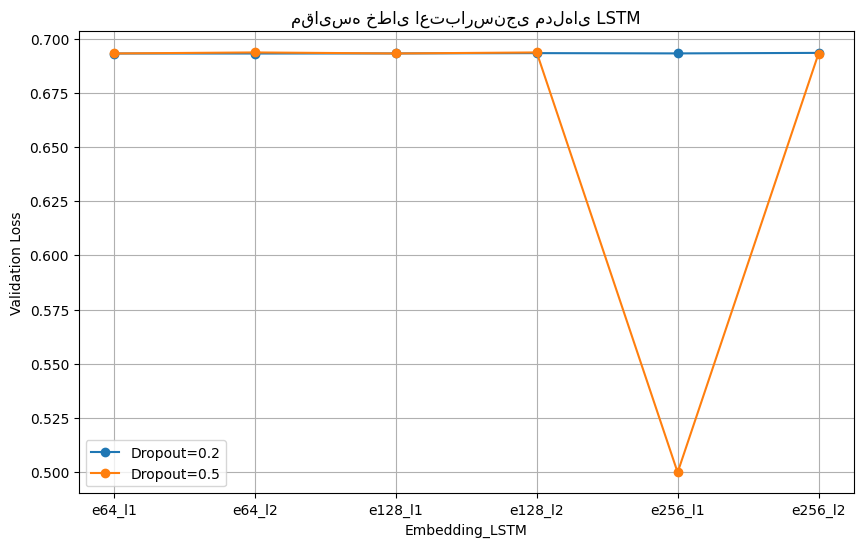

In [37]:
import matplotlib.pyplot as plt
from itertools import product

results = []

# همه ترکیب‌های ممکن پارامترها
embedding_dims = [64, 128, 256]
lstm_counts = [1, 2]
dropouts = [0.2, 0.5]
combinations = list(product(embedding_dims, lstm_counts, dropouts))

for emb_dim, lstm_layers, dropout in combinations:
    print(f"\nTraining model with emb_dim={emb_dim}, lstm_layers={lstm_layers}, dropout={dropout}")

    model = create_model(embedding_dim=emb_dim, lstm_layers=lstm_layers, dropout_rate=dropout)
    history = model.fit(np.array(X_train_pad), np.array(y_train),
                        epochs=5,
                        batch_size=64,
                        validation_split=0.1)

    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]

    results.append({
        'embedding_dim': emb_dim,
        'lstm_layers': lstm_layers,
        'dropout': dropout,
        'val_accuracy': val_acc,
        'val_loss': val_loss
    })

    y_pred = model.predict(np.array(X_test_pad))
    y_pred_labels = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_labels, target_names=['happy', 'sad']))


# رسم نمودار دقت
plt.figure(figsize=(10, 6))
for dropout in dropouts:
    filtered = [r for r in results if r['dropout'] == dropout]
    labels = [f"e{r['embedding_dim']}_l{r['lstm_layers']}" for r in filtered]
    accs = [r['val_accuracy'] for r in filtered]
    plt.plot(labels, accs, marker='o', label=f"Dropout={dropout}")

plt.title("مقایسه دقت اعتبارسنجی مدل‌های LSTM")
plt.xlabel("Embedding_LSTM")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# رسم نمودار خطا
plt.figure(figsize=(10, 6))
for dropout in dropouts:
    filtered = [r for r in results if r['dropout'] == dropout]
    labels = [f"e{r['embedding_dim']}_l{r['lstm_layers']}" for r in filtered]
    losses = [r['val_loss'] for r in filtered]
    plt.plot(labels, losses, marker='o', label=f"Dropout={dropout}")

plt.title("مقایسه خطای اعتبارسنجی مدل‌های LSTM")
plt.xlabel("Embedding_LSTM")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


In [34]:
model = create_model(embedding_dim=128, lstm_layers=1, dropout_rate=0.5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [35]:
import numpy as np

history = model.fit(np.array(X_train_pad), np.array(y_train),
                    epochs=5,
                    batch_size=64,
                    validation_split=0.1)

Epoch 1/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5028 - loss: 0.6944 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 2/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4932 - loss: 0.6939 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 3/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5001 - loss: 0.6935 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 4/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5010 - loss: 0.6934 - val_accuracy: 0.4947 - val_loss: 0.6936
Epoch 5/5
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5019 - loss: 0.6935 - val_accuracy: 0.4949 - val_loss: 0.6940


In [36]:
from sklearn.metrics import classification_report

y_pred = model.predict(np.array(X_test_pad))
y_pred_labels = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_labels, target_names=['happy', 'sad']))

324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

       happy       0.50      1.00      0.66      5158
         sad       0.00      0.00      0.00      5201

    accuracy                           0.50     10359
   macro avg       0.25      0.50      0.33     10359
weighted avg       0.25      0.50      0.33     10359



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
 import numpy as np

def predict_sentiment(text):
    # تبدیل متن به دنباله
    seq = tokenizer.texts_to_sequences([text])  # [text] چون باید لیست باشد
    padded = pad_sequences(seq, maxlen=maxlen, padding='post')

    # پیش‌بینی
    probs = model.predict(np.array(padded))
    prediction = np.argmax(probs, axis=1)[0]

    return "+" if prediction == 1 else "-"


print(predict_sentiment("سرد بود وقتی به دست رسید"))  # منفی؟
print(predict_sentiment("خوشمزه بود"))                 # مثبت؟
print(predict_sentiment("به موقع ارسال شد"))          # مثبت؟
print(predict_sentiment("سفارش افتضاح بود!"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
-
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
-
